In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc as smi
import numpy as np
import pandas as pd
import os
from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor

In [12]:
cwd = os.getcwd()
train_dir = cwd+'\training.csv'

In [13]:
#train_df = pd.read_csv('training.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],index_col = False, header = 0)
#Read the kaggle training dataset
train_df = pd.read_csv('training.csv',index_col =False,header=0)

In [10]:
#X_train = train_df['Image'][0]

array([ 238.,  236.,  237., ...,   70.,   75.,   90.])

In [14]:
##Currently Image is a string. Split and convert to numeric
train_df['Image'] = train_df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

In [62]:
#im_train = pd.read_csv('training.csv',usecols=[30],index_col = False, header = 0)
#train_df['Image']

In [63]:
cols=None
if cols:  # get a subset of columns
    train_df = train_df[list(cols) + ['Image']]

In [64]:
print(train_df.count()) 

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [15]:
#Drop columns that dont have all the columns populated 
train_df = train_df.dropna()

In [16]:
print(train_df.count())

left_eye_center_x            2140
left_eye_center_y            2140
right_eye_center_x           2140
right_eye_center_y           2140
left_eye_inner_corner_x      2140
left_eye_inner_corner_y      2140
left_eye_outer_corner_x      2140
left_eye_outer_corner_y      2140
right_eye_inner_corner_x     2140
right_eye_inner_corner_y     2140
right_eye_outer_corner_x     2140
right_eye_outer_corner_y     2140
left_eyebrow_inner_end_x     2140
left_eyebrow_inner_end_y     2140
left_eyebrow_outer_end_x     2140
left_eyebrow_outer_end_y     2140
right_eyebrow_inner_end_x    2140
right_eyebrow_inner_end_y    2140
right_eyebrow_outer_end_x    2140
right_eyebrow_outer_end_y    2140
nose_tip_x                   2140
nose_tip_y                   2140
mouth_left_corner_x          2140
mouth_left_corner_y          2140
mouth_right_corner_x         2140
mouth_right_corner_y         2140
mouth_center_top_lip_x       2140
mouth_center_top_lip_y       2140
mouth_center_bottom_lip_x    2140
mouth_center_b

In [19]:
#Save only image data as X and normalize the pixel data
X = np.vstack(train_df['Image'].values) / 255.  # scale pixel values to [0, 1]
#X = np.vstack(train_df['Image'].values)  # scale pixel values to [0, 1]
X = X.astype(np.float32)

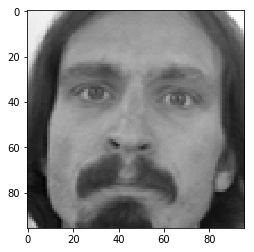

In [37]:
#Plot to validate the image
plt.imshow(X[0].reshape((96,96)), cmap = 'gray')

In [29]:
#Save y as the 15 landmarks (30 points)
y = train_df[train_df.columns[:-1]].values
#y = (y - 48) / 48  # scale target coordinates to [-1, 1]
#X, y = shuffle(X, y, random_state=42)  # shuffle train data
y = y.astype(np.float32)

In [32]:
(y[0,:])

array([ 66.03356171,  39.00227356,  30.22700691,  36.42167664,
        59.58207703,  39.64742279,  73.13034821,  39.96999741,
        36.3565712 ,  37.38940048,  23.45287132,  37.38940048,
        56.95326233,  29.03364754,  80.22712708,  32.22813797,
        40.22760773,  29.00232124,  16.35637856,  29.64747047,
        44.42057037,  57.06680298,  61.19530869,  79.97016907,
        28.61449623,  77.38899231,  43.312603  ,  72.93545532,
        43.13070679,  84.48577118], dtype=float32)

In [33]:
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(y.shape, y.min(), y.max()))

X.shape == (2140, 9216); X.min == 0.000; X.max == 1.000
y.shape == (2140, 30); y.min == 3.826; y.max == 95.809


In [48]:
# Use sklearn NN  having 2 hidden layers of 30 nodes. Need to modify layer counts and nodes in each layer and compute RMSE to determine best model

nn = MLPRegressor((30,30))

In [49]:
#Fit the model on training data
nn.fit(X,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [50]:
#Currently predicting on training data itself. Need to use test dataset here
nn.predict(X[0:2])
#X[0:2].shape

array([[  93.99163099,   49.56173824,   42.92577314,   52.68312781,
          83.40229799,   54.52705451,  100.61746338,   53.46556252,
          50.84776164,   51.85103025,   32.58637954,   53.9328356 ,
          80.86036203,   41.80635723,  106.8316069 ,   41.7015202 ,
          56.1485773 ,   42.9702591 ,   22.81790567,   41.77786775,
          65.15700473,   81.65953383,   86.65185256,  106.12139398,
          44.92846345,  103.73031565,   65.37496435,  100.27058049,
          65.44932833,  115.5883733 ],
       [  57.88141334,   33.19015964,   27.86639233,   33.0678412 ,
          54.34145071,   32.54747437,   67.24158123,   33.266345  ,
          34.21005847,   34.35016937,   19.57384464,   32.99309228,
          48.99629427,   25.18187257,   70.02641915,   24.94419081,
          35.08781394,   27.6095671 ,   14.14357714,   25.22539917,
          45.23657777,   50.33165528,   58.33749499,   68.74834185,
          30.96712808,   65.66833856,   43.1452598 ,   65.18287158,
         

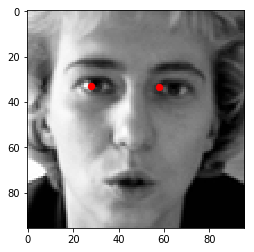

In [52]:
#Plotttig image with 2 points to verify
#im = plt.imread(image_name)
implot = plt.imshow(X[1].reshape((96,96)), cmap = 'gray')

# # put a blue dot at (10, 20)
# plt.scatter([90.62], [52.24],[44],[50.27])

# put a red dot, size 40, at 2 locations:
plt.scatter(x=[57.88, 27.866], y=[33.190, 33.06], c='r', s=40)

plt.show()

In [46]:
y[1]

array([ 64.33293915,  34.97007751,  29.94927597,  33.44871521,
        58.85617065,  35.27434921,  70.72272491,  36.18716431,
        36.03472519,  34.3615303 ,  24.47251129,  33.14444351,
        53.98740387,  28.27594948,  78.63421631,  30.40592384,
        42.72885132,  26.14604187,  16.86536217,  27.05885887,
        48.20629883,  55.66093445,  56.42144775,  76.35199738,
        35.12238312,  76.04766083,  46.68459702,  70.26655579,
        45.46791458,  85.4801712 ], dtype=float32)